# Notebook Structure

1. Import necessary dependencies
2. Create the dataset
3. Create stacked area chart


# 1. Import necessary dependencies

In [177]:
# libraries & dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

sns.set_theme(style="whitegrid")

# 2. Create the dataset

In [178]:
# Sample Data (Replace with your actual data)
dates = pd.to_datetime([
    '2014-07-04', '2014-08-01', '2014-08-08', '2014-09-01', '2014-09-08', '2014-10-01',
    '2014-10-08', '2014-11-01', '2014-11-08', '2014-12-01', '2014-12-08', '2015-01-01',
    '2015-01-08', '2015-02-01', '2015-02-08', '2015-03-01', '2015-03-08', '2015-04-01',
    '2015-04-08', '2015-05-01', '2015-05-08', '2015-06-01'
])

level1 = np.array([12, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 3, 4, 5, 6, 7, 3, 2, 3, 2, 1])
level2 = np.array([24, 25, 26, 27, 28, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 6, 7, 8, 7, 6])
level3 = np.array([54, 52, 55, 53, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 12, 10, 9, 10, 11])
level4 = 100 - level1 - level2 - level3

In [179]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Level 1': level1,
    'Level 2': level2,
    'Level 3': level3,
    'Level 4': level4
})
df

,Date,Level 1,Level 2,Level 3,Level 4
0,2014-07-04,12,24,54,10
1,2014-08-01,13,25,52,10
2,2014-08-08,11,26,55,8
3,2014-09-01,10,27,53,10
4,2014-09-08,9,28,56,7
5,2014-10-01,8,26,58,8
6,2014-10-08,7,25,60,8
7,2014-11-01,6,24,62,8
8,2014-11-08,5,23,64,8
9,2014-12-01,4,22,66,8


# 3. Create stacked area chart for composition analysis

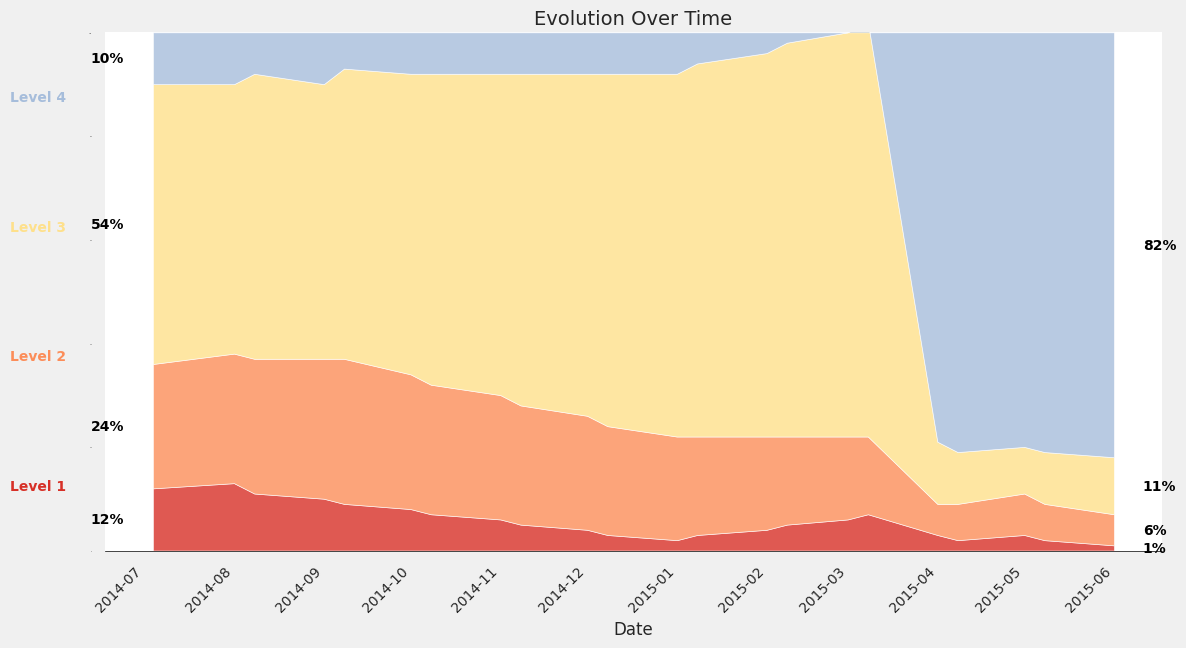

In [180]:
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#f0f0f0')

# Colors corresponding to the levels
colors = ['#d73027', '#fc8d59', '#fee08b', '#a6bddb'] # Red, Orange, Yellow, Light Blue

# Stacked area chart
ax.stackplot(df['Date'], df['Level 1'], df['Level 2'], df['Level 3'], df['Level 4'],
               labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'], colors=colors, alpha=0.8, edgecolor='white', linewidth=0.5)

# Add percentage labels at the start and end, positioned on the sides
start_date = df['Date'].iloc[0]
end_date = df['Date'].iloc[-1]
start_values = df[['Level 1', 'Level 2', 'Level 3', 'Level 4']].iloc[0].values
end_values = df[['Level 1', 'Level 2', 'Level 3', 'Level 4']].iloc[-1].values
total_start = np.sum(start_values)
total_end = np.sum(end_values)
y_start_positions = np.cumsum(start_values) - start_values / 2
y_end_positions = np.cumsum(end_values) - end_values / 2
x_offset = 0.1 # Offset from the edge

for i, val in enumerate(start_values):
    percentage = (val / total_start) * 100
    ax.text(start_date - pd.Timedelta(days=10), y_start_positions[i], f'{percentage:.0f}%',
            ha='right', va='center', color='black', fontsize=10, fontweight='bold')

for i, val in enumerate(end_values):
    percentage = (val / total_end) * 100
    ax.text(end_date + pd.Timedelta(days=10), y_end_positions[i], f'{percentage:.0f}%',
            ha='left', va='center', color='black', fontsize=10, fontweight='bold')

# Add color labels on the left
y_label_positions_left = np.linspace(0, 100, len(colors) * 2 + 1)[1::2] # Evenly spaced
padding = 2 # Vertical padding

for i, color in enumerate(colors):
    y_pos = y_label_positions_left[i]
    ax.text(df['Date'].iloc[0] - pd.Timedelta(days=30), y_pos, f'Level {i+1}',
            ha='right', va='center', color=color, fontsize=10, fontweight='bold')

# Set y-axis formatting
ax.set_ylabel('') # Remove y-axis label
ax.tick_params(axis='y', labelsize=0) # Remove y-axis tick labels
ax.set_yticks(np.arange(0, 101, 20)) # Keep the ticks for visual scale, but no labels
# ax.set_yticklabels([f'{i}%' for i in range(0, 101, 20)], fontsize=10) # If you want to keep some labels
ax.set_ylim(0, 100)

# Set x-axis formatting
ax.set_xlabel('Date', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')

# Title (adjust as needed)
ax.set_title('Evolution Over Time', fontsize=14)

# Remove legend
ax.legend().set_visible(False)

# Remove spines (keep bottom for x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['bottom'].set_color('black')

ax.grid(visible=None)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for labels
plt.show()